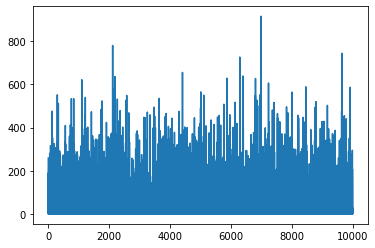

50.95865931604268


In [5]:
import numpy as np
import statistics
def generator(lambda_):
    return lambda_ * (np.random.exponential(size=len(lambda_)))

lam = []
for i in range(1,10000):
    if i % 2 == 1:
        lam.append(100)
    else:
        lam.append(1/100)

seq=generator(lam)
# seq.sort()
import matplotlib.pyplot as plt
plt.plot(seq)
plt.show()
print(statistics.mean(seq))

In [7]:
lam

[100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,
 100,
 0.01,

In [1]:
seq = []
for i in range(1,10000):
    if i % 2 == 1:
        seq.append(100 * np.random.exponential(scale = i))
    else:
        seq.append(1/100 * np.random.exponential(scale = i))

plt.plot(seq)
plt.show()

usage: ipykernel_launcher.py [-h] [--num-steps NUM_STEPS]
                             [--hidden-size HIDDEN_SIZE]
                             [--batch-size BATCH_SIZE] [--minibatch]
                             [--log-every LOG_EVERY] [--anim-path ANIM_PATH]
                             [--anim-every ANIM_EVERY]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/peng/Library/Jupyter/runtime/kernel-9f760c1b-67c2-447d-8239-4fc4cf4c99e1.json


SystemExit: 2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
np.random.exponential()

0.07651146735358055

In [26]:
import numpy as np

dataset = np.zeros(shape=(5000,1000))
for j in range(0,5000):
    for i in range(0,1000):
        if i % 2 == 1:
            dataset[j][i] = 100 * np.random.exponential()
        else:
            dataset[j][i] = 1/100 * np.random.exponential()

In [39]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
def define_generator(z):
    """Generates a batch of images from random noise vectors z.
    
    Input: A batch of noise samples, arranged in a matrix of dimension BATCH_SIZE x NOISE_DIM
    Output: A batch of generated images, arranged in a matrix of dimension BATCH_SIZE x IMAGE_SIZE
    """
    model = Sequential()
    model.add(Dense(300, input_dim=z))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(700))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1000))
    model.add(LeakyReLU(alpha=0.2))
    return model

def define_discriminator(x = (1000)):
    """Takes a batch of images x and returns a batch of scores that indicate how confident the discriminator
    is that the each image is real.
    
    Input: A batch of images x, in a matrix of dimension BATCH_SIZE x IMAGE_SIZE
    Output: A batch of real/fake scores, in a matrix of dimension BATCH_SIZE x 1
    """
    model = Sequential()
    model.add(Dense(70, input_dim=x))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(30))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(10))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y

def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch

        # evaluate the model performance, sometimes
        if (i+1) % 10 == 0:
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
            
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>10, 39/39, d=1.169, g=0.221
>Accuracy real: 93%, fake: 0%


KeyboardInterrupt: 